<a href="https://colab.research.google.com/github/Prana1096/Netflix_Movies_and_Tv_shows_Clustering/blob/main/module_6_project_copy_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Netflix Movies and Tv shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member**    - Pranali G.Randhe
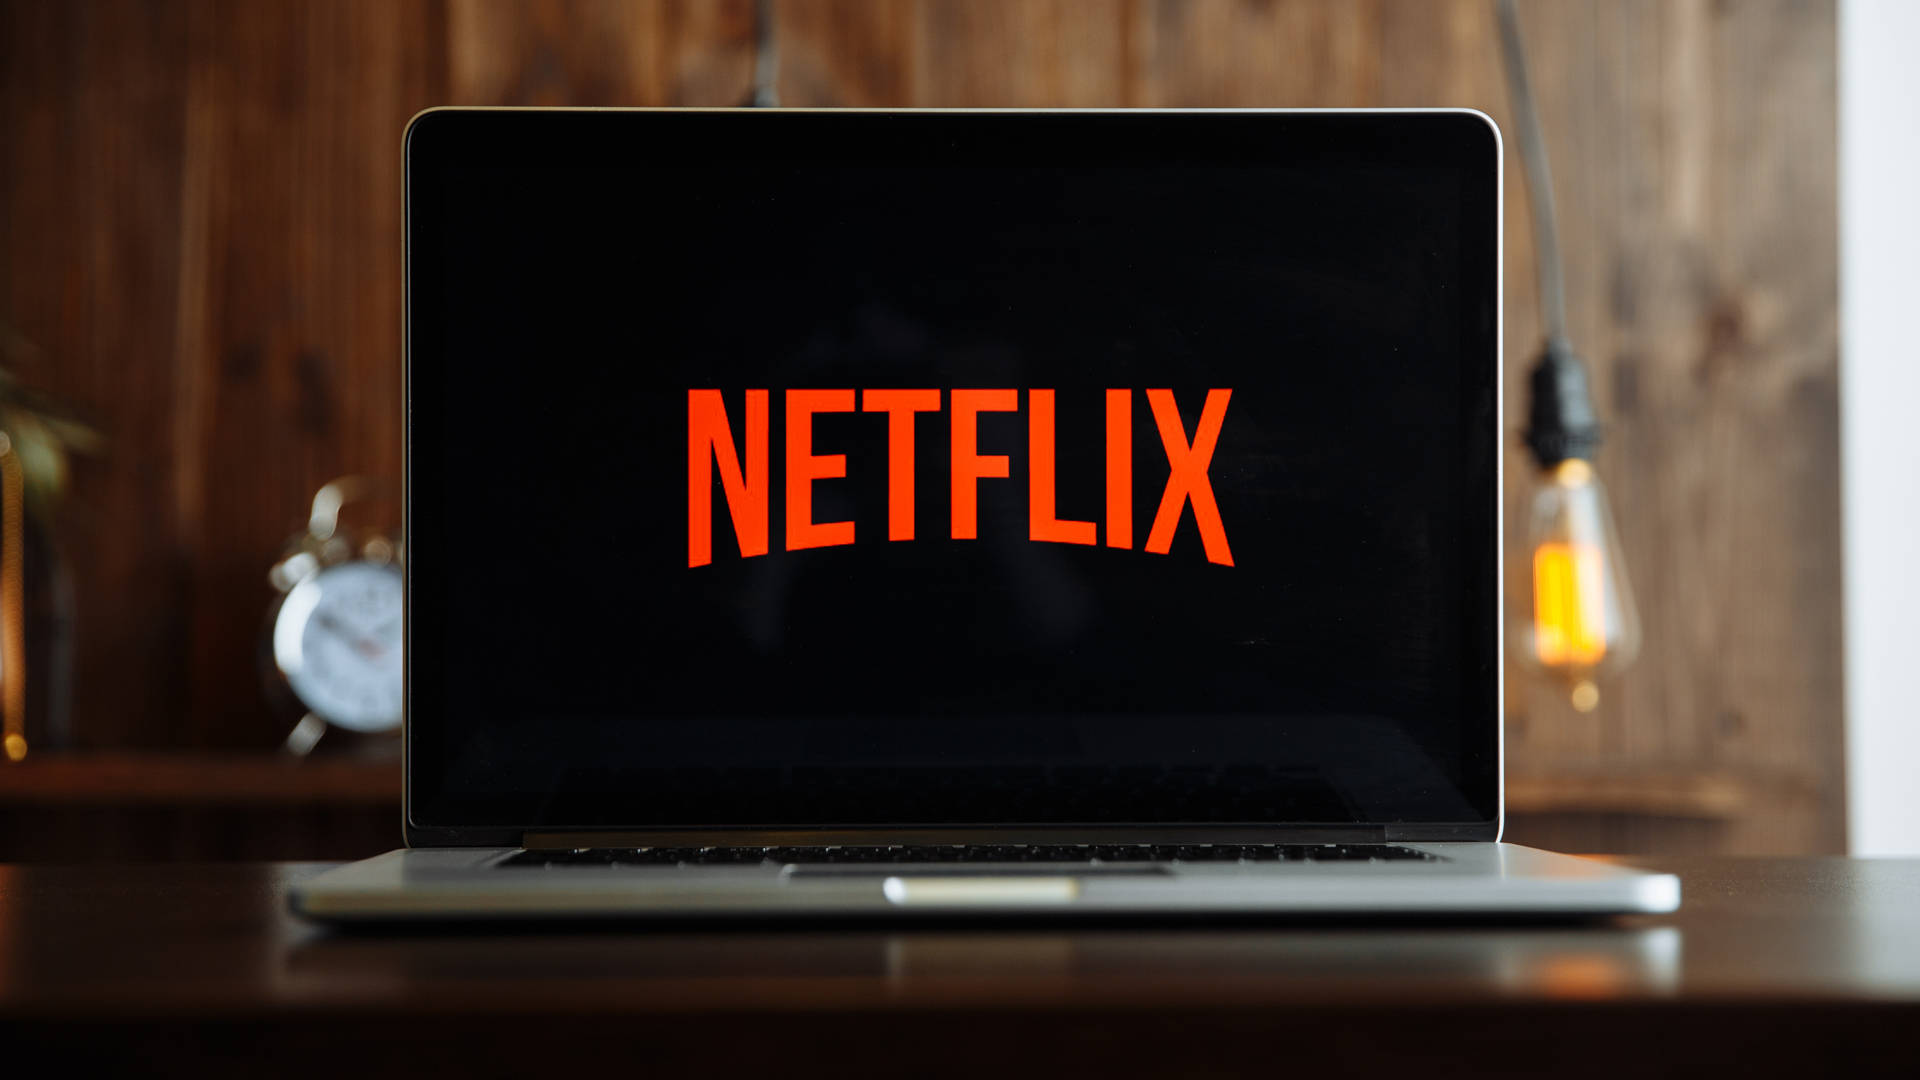

# **Project Summary -**


This project is all about diving deep into Netflix's huge collection of movies and TV shows. The goal is to organize them into groups that make sense, with the aim of making Netflix more enjoyable for its users and keeping them subscribed.

We start with a bunch of data (about 7,787 records with 11 pieces of information each). First, we deal with any missing info and then look at the data to learn interesting things.

The really important parts we focus on are: who's in the movie or show, where it's from, what type it is, who directed it, how it's rated, and a short description.

We use something called TFIDF (don't worry about the details) to turn this information into numbers that computers can understand. Then, to make it simpler, we use something called PCA to crunch these numbers down.

We want to put the movies and shows into groups that are alike. To figure out how many groups we need, we try different methods like looking at graphs and scores. We use two ways of making groups: one called K-Means and another called Agglomerative Hierarchical.

Then, we make a special chart that shows how similar each movie or show is to others. This helps us build a smart system that suggests things you might like based on what you've watched before.

In the end, this project is all about making Netflix better for everyone by sorting its shows and movies into groups and suggesting new things you might enjoy based on what you already like.

# **GitHub Link -**

https://github.com/Prana1096/Netflix_Movies_and_Tv_shows_Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
My Task is to make a Model that can cluster similar type of content together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/projects/Netflix Data Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(df.columns)
rows = df.shape[0]
columns = df.shape[1]
print (f'The rows are {rows} and The  columns sre {columns} ')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
The rows are 7787 and The  columns sre 12 


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print ( f'In this Dataset there are {len(df[df.duplicated()])} duplicate values')

In this Dataset there are 0 duplicate values


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Null_count = df.isnull().sum()
Null_count

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

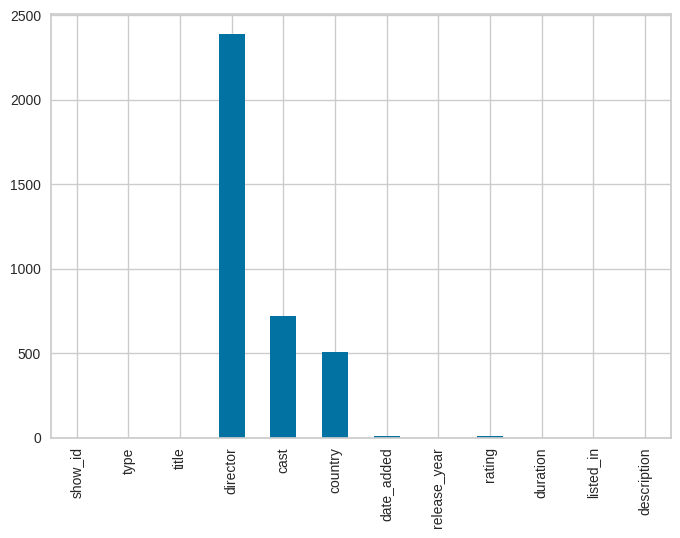

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot.bar()
plt.show()

### What did you know about your dataset?

We've got a big list of 7,787 Netflix shows and movies. Each one has its own special ID, like "s1" or "s2". We know if it's a TV show or a movie.

We also have details about each show, like its name ("Rich in Love"), who directed it, and who's in it. There are shows from 681 different countries, and we know when they were added to Netflix, their release year, and how they're rated.

These shows come in 419 different types, like foreign TV shows, romantic comedies, and thrillers. We also know there are 216 different descriptions and how long each season lasts in minutes.

Good news: there are no copies of the same show in our list. But, there are some missing details in some shows:

We don't know who directed 2,389 shows.
For 718 shows, we don't know who the actors are.
The country where 507 shows are from is a mystery.
We're missing the date for 10 shows.
And, we don't have ratings for 7 shows.
We're going to use all this info to make sense of what people like on Netflix!

## ***Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f'there are { df.shape[1]} columns and they are as follow {df.columns}')

there are 12 columns and they are as follow Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

We've got a list with 7,787 things (rows), and each thing has 12 pieces of information (columns). Let me break it down for you:

1. Show ID (Show_id): A special code for each thing in our list.

2. Type (type): Tells us if it's a movie or a TV show.

3. Title (title): The name of the movie or TV show.

4. Director (director): The person who directed the movie or show.

5. Cast (cast): The actors and actresses in the movie or show.

6. Country (country): The country where the movie or show comes from.

7. Date Added (date_added): When the movie or show was added to Netflix.

8. Release Year (release_year): The year the movie or show was first shown.

9. Rating (rating): How good people think the movie or show is.

10. Duration (duration): How long the movie or show lasts.

11. Listed In (listed_in): The category the movie or show is put in.

12. Description (description): A little summary or explanation of what the movie or show is about.

So, basically, we have a bunch of information about a bunch of movies and TV shows!





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

##  ***Data Wrangling***

data wrangling code

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***